<a href="https://colab.research.google.com/github/bhubam/credit/blob/master/Lstmandregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import pandas_datareader as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
df = web.DataReader('SBIN.NS',data_source='yahoo',start='2012-01-01',end='2020-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,163.600006,161.139999,162.899994,162.764999,14464990.0,89.596375
2012-01-03,171.000000,164.300003,164.399994,170.565002,21341020.0,93.889992
2012-01-04,171.389999,167.520004,171.199997,169.604996,22241630.0,93.361534
2012-01-05,171.854996,168.005005,169.600006,169.244995,21344840.0,93.163368
2012-01-06,170.759995,165.804993,167.500000,167.274994,21137420.0,92.078941
...,...,...,...,...,...,...
2019-12-27,338.350006,333.000000,333.399994,337.250000,33477173.0,337.250000
2019-12-30,337.850006,332.500000,337.750000,334.399994,22775554.0,334.399994
2019-12-31,336.350006,332.549988,334.399994,333.750000,23801635.0,333.750000


In [ ]:
df.shape

(1967, 6)

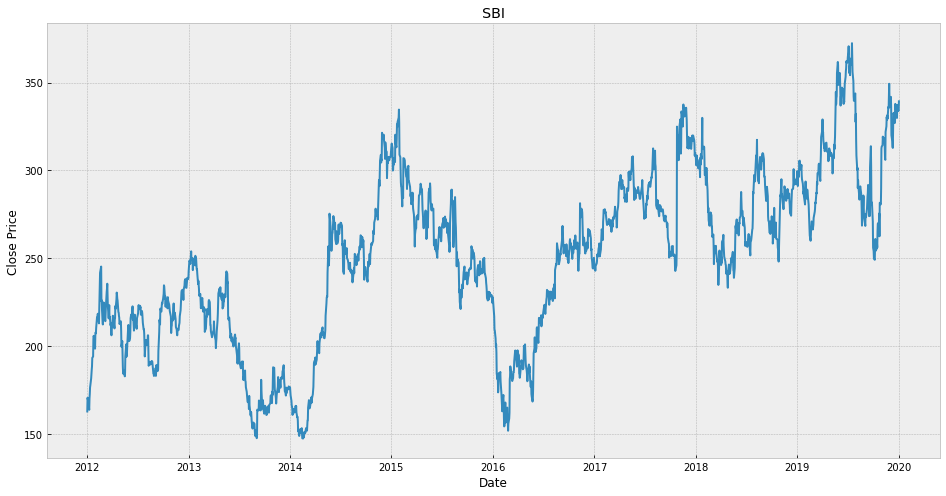

In [ ]:

plt.figure(figsize=(16,8))
plt.title('SBI')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=df.filter(['Close'])
df =df.dropna()
# print(df.size)
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data =scaler.fit_transform(df)
# scaled_data
dataset = df.values
df.head(4)

,Close
Date,
2012-01-02,162.764999
2012-01-03,170.565002
2012-01-04,169.604996
2012-01-05,169.244995


In [ ]:

f_d = 250
df['Prediction']=df['Close'].shift(-f_d)
df.head(4)

,Close,Prediction
Date,,
2012-01-02,162.764999,249.335007
2012-01-03,170.565002,252.279999
2012-01-04,169.604996,253.910004
2012-01-05,169.244995,249.104996


In [ ]:
X = np.array(df.drop(['Prediction'], 1))[:-f_d]
print(X)

[[162.76499939]
 [170.56500244]
 [169.60499573]
 ...
 [292.75      ]
 [300.70001221]
 [294.04998779]]


In [ ]:
y = np.array(df['Prediction'])[:-f_d]
print(y)

[249.33500671 252.27999878 253.91000366 ... 333.75       334.45001221
 339.29998779]


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data

array([[0.06845449],
       [0.10311501],
       [0.09884907],
       ...,
       [0.82825278],
       [0.83136339],
       [0.85291501]])

In [ ]:
training_data_len =math.ceil(len(dataset)*.8)
training_data_len

1574

In [ ]:
train_data = scaled_data[0:training_data_len , :]
x_train =[]
y_train =[]
for i in range(250,len(train_data)):
  x_train.append(train_data[i-250:i,0])
  y_train.append(train_data[i,0])
  if i<= 251:
    print(x_train)
    print(y_train)
    print()

[array([0.06845449, 0.10311501, 0.09884907, 0.09724936, 0.08849535,
       0.07272043, 0.10175966, 0.11258002, 0.12922148, 0.13442055,
       0.15232847, 0.16459294, 0.17408018, 0.18250086, 0.20407485,
       0.20747424, 0.25204409, 0.25968719, 0.2519552 , 0.22735956,
       0.2612869 , 0.26841895, 0.26617488, 0.27975028, 0.30619001,
       0.30194632, 0.31289991, 0.31567719, 0.31030041, 0.29134822,
       0.32285372, 0.34529419, 0.38959743, 0.4192366 , 0.43496711,
       0.34722717, 0.34967119, 0.3252755 , 0.28850429, 0.33667349,
       0.34391667, 0.33111892, 0.34353893, 0.3121445 , 0.29961342,
       0.2968139 , 0.33451831, 0.37202277, 0.37944366, 0.39157482,
       0.36691252, 0.33518483, 0.30392377, 0.31716585, 0.33738449,
       0.30527906, 0.30801193, 0.28610468, 0.29130374, 0.26912995,
       0.26117577, 0.27672856, 0.2918592 , 0.31058926, 0.3061456 ,
       0.27855048, 0.30110201, 0.3043681 , 0.33502936, 0.32825274,
       0.35171523, 0.36913435, 0.36355761, 0.3534705 , 0.3496

In [ ]:
x_train,y_train =np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1324, 250, 1)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import LSTM 

In [ ]:
model =Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=10,epochs=4)

Epoch 1/4
1324/1324 [==============================] - 28s 21ms/step - loss: 0.0106
Epoch 2/4
1324/1324 [==============================] - 28s 21ms/step - loss: 0.0023
Epoch 3/4
1324/1324 [==============================] - 28s 21ms/step - loss: 0.0020
Epoch 4/4
1324/1324 [==============================] - 28s 21ms/step - loss: 0.0019


In [ ]:
test_data = scaled_data[training_data_len -250 :,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(250, len(test_data)):
  x_test.append(test_data[i-250:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
# print(x_test[250])

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5992828446793496

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


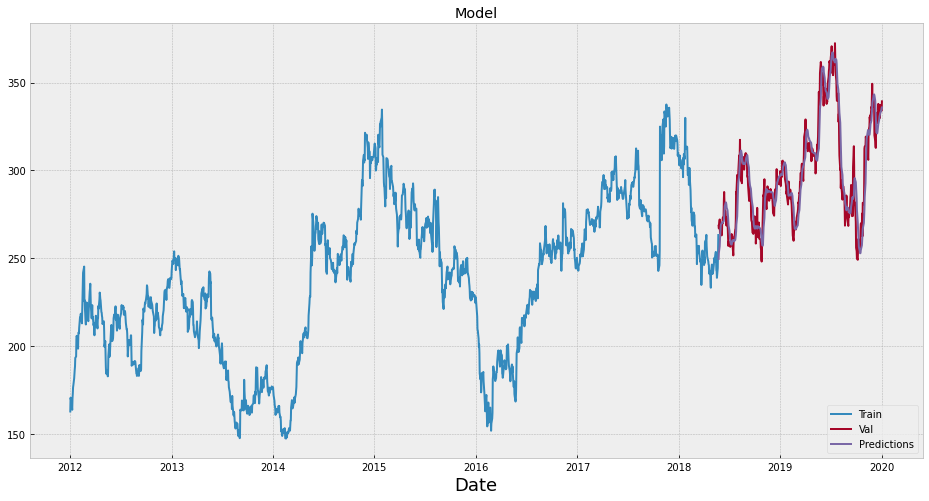

In [ ]:
train = df[:training_data_len]
valid =  df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Prediction,Predictions
Date,,,
2018-05-24,268.500000,355.450012,249.622864
2018-05-25,266.950012,352.399994,253.080551
2018-05-28,272.049988,336.899994,256.868866
2018-05-29,264.299988,342.049988,261.081512
2018-05-30,267.149994,344.299988,264.189117
...,...,...,...
2019-12-27,337.250000,NaN,332.638000
2019-12-30,334.399994,NaN,333.860413
2019-12-31,333.750000,NaN,334.796783


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr= LinearRegression().fit(x_train,y_train)

In [ ]:
x_train.shape

(1201, 1)

In [ ]:
x_f = df.drop(['Prediction'],1)[:-f_d]
x_f=x_f.tail(f_d)
x_f=np.array(x_f)
x_f

array([[312.25      ],
       [318.8999939 ],
       [319.79998779],
       [317.5       ],
       [316.75      ],
       [319.8500061 ],
       [317.1499939 ],
       [314.8500061 ],
       [308.3999939 ],
       [309.8999939 ],
       [307.1000061 ],
       [303.25      ],
       [302.8500061 ],
       [308.5       ],
       [306.3500061 ],
       [305.79998779],
       [304.29998779],
       [301.1000061 ],
       [302.20001221],
       [302.25      ],
       [302.6000061 ],
       [296.1499939 ],
       [307.1000061 ],
       [303.25      ],
       [309.25      ],
       [306.5       ],
       [318.1000061 ],
       [329.8999939 ],
       [313.1499939 ],
       [312.1000061 ],
       [313.54998779],
       [313.25      ],
       [306.04998779],
       [297.3500061 ],
       [298.04998779],
       [291.75      ],
       [292.79998779],
       [301.3999939 ],
       [296.3999939 ],
       [288.75      ],
       [276.20001221],
       [278.70001221],
       [271.6499939 ],
       [268

In [ ]:
tree_p =tree.predict(x_f)
print(tree_p)
print()
lr_p=lr.predict(x_f)
print(lr_p)

[284.3999939  235.94999695 294.1499939  292.1499939  294.79998779
 295.8999939  299.6000061  293.8999939  305.54998779 297.6499939
 231.98333232 296.67498779 305.29998779 305.54998779 293.7250061
 300.3999939  301.6499939  267.1000061  234.59999847 234.59999847
 183.3500061  290.25       231.98333232 296.67498779 285.3999939
 226.3999939  280.6000061  169.3999939  293.6499939  284.3999939
 274.20001221 284.6499939  289.04998779 287.3999939  253.6000061
 197.05000305 263.29998779 267.1000061  262.95001221 259.95001221
 262.8999939  267.70001221 273.3500061  285.95000458 294.2666626
 329.79998779 259.3500061  222.92499542 272.95001221 276.45001221
 278.1000061  272.125      281.20001221 287.3500061  286.8999939
 254.88749695 291.8999939  298.3999939  277.         309.3999939
 341.1000061  298.04998779 294.         317.1499939  308.79998779
 278.         322.75       329.         320.5        165.83000183
 317.04998779 258.8999939  314.75       269.375      256.8500061
 262.75       315.6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


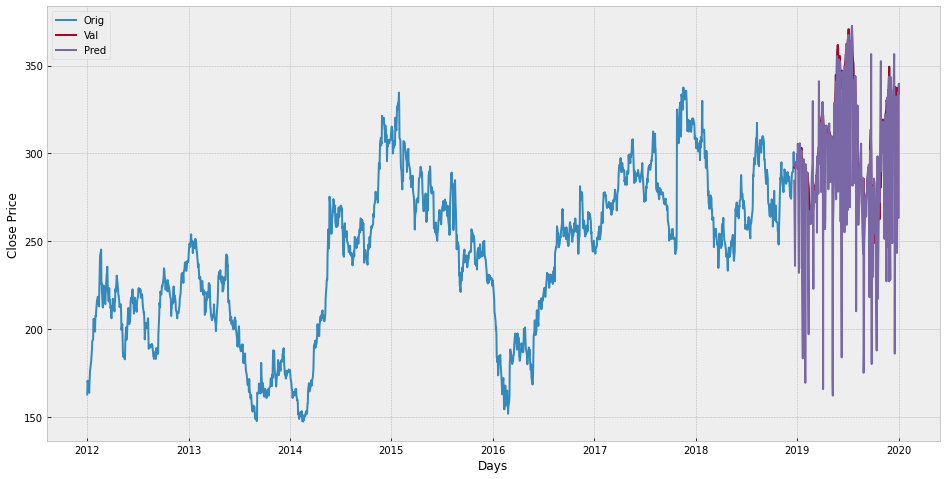

In [ ]:
pr =tree_p
valid = df[X.shape[0]:]
valid['Predictions']=pr
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


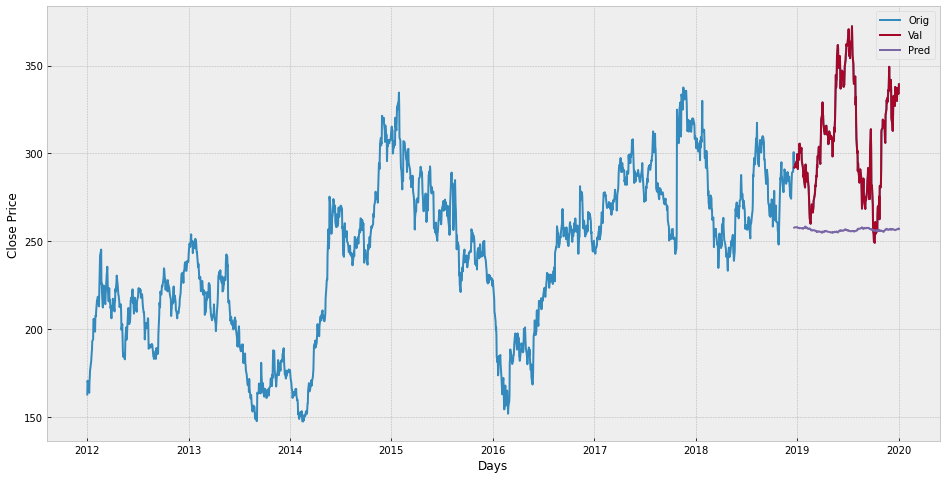

In [ ]:
pr =lr_p
valid = df[X.shape[0]:]
valid['Predictions']=pr
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()